<a href="https://colab.research.google.com/github/debangeedas/SEM/blob/main/Load_Specific_Dataset_and_Conduct_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scanpy
import urllib
import scanpy

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=792e9e36d7037ec026316dc8e532a54994df1362ad8793cd3f2d76d9e8364b07
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeatur

In [2]:
obs_attributes = adata.obs.columns.tolist()  # List of obs attributes
var_attributes = adata.var.columns.tolist()  # List of var attributes

print("Obs attributes:", obs_attributes)
print("Var attributes:", var_attributes)

Obs attributes: ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']
Var attributes: ['feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


In [3]:
# Get gene id mapping to its name
if 'feature_name' in adata.var.columns:
    gene_ids = adata.var.index
    gene_names = adata.var['feature_name']

gene_mapping = dict(zip(gene_ids, gene_names))
print(gene_mapping.values())
print("Total number of gene_ids:", len(gene_mapping.keys()))

required_gene_names = ['SLC26A3','RASGEF1B','RP11-701H24.9','LINGO1','PDE4DIP','AC159540.1','RP11-289H16.1','RP11-219A15.1','LINC01609','PHYHIP','RP11-745L13.2']
for gene_id, gene_name in list(gene_mapping.items()):
  if gene_name in required_gene_names or gene_name.startswith("RP11-"):
    print(f"Gene ID: {gene_id}, Gene Name: {gene_name}")


dict_values(['ENSG00000278915.1', 'TXNDC2', 'NDUFA9', 'ENSG00000229177.1', 'C6orf136', 'GADD45A', 'SPON1-AS1', 'EFCC1', 'ENSG00000257894.2', 'TMEM207', 'CD82', 'G2E3', 'GPR142', 'ITPA', 'MGMT', 'ENSG00000231662.1', 'NLRC5', 'ENSG00000261198.1', 'DBX2', 'WIPF2', 'KCTD4', 'OR4S2', 'KDR', 'ENSG00000272564.1', 'ENSG00000270000.1', 'ENSG00000267683.1', 'CENPJ', 'MGAM', 'TNP2', 'ENSG00000251665.1', 'LINC01919', 'ZBTB26', 'WDR41', 'LINC02795', 'TRHDE', 'RAB11FIP4', 'MNX1', 'LINC01410', 'RLBP1', 'RASL10B', 'ZNF429', 'ENSG00000249776.5', 'GYPB', 'TMEM273', 'OLFML2B', 'GRXCR1', 'CDK16', 'ENSG00000256250.1', 'ENSG00000247121.8', 'SMARCAD1', 'MLF2', 'ENSG00000282772.1', 'PLPPR4', 'ENSG00000253266.1', 'ZNRF1', 'H2AC11', 'ENSG00000260683.1', 'LINC02204', 'SLC22A14', 'L3MBTL1', 'NOTCH2', 'ANKRD44', 'SHANK2-AS2', 'FSCN1', 'LINC01732', 'BAP1', 'GDPD2', 'TNNI3K', 'ZNF7', 'HIBADH', 'NXF5', 'ENSG00000273204.1', 'TRDV3', 'SLC26A3', 'RPUSD1', 'C16orf87', 'IGKV1-37', 'IGLVVI-22-1', 'ENSG00000237316.1', 'ZNF7

In [5]:
# prompt: create a dataframe with only those with adata.var['feature_name'] in required_gene_names

adata_filtered = adata[:, [gene_name in required_gene_names for gene_name in adata.var['feature_name']]]
adata_filtered

View of AnnData object with n_obs × n_vars = 23197 × 6
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [25]:
# prompt: verify the unique feature_name in adata_filtered

# Verify unique feature_names in adata_filtered
unique_feature_names = adata_filtered.var['feature_name'].unique().tolist()
print("Unique feature names in adata_filtered:", unique_feature_names)

# Check if all required gene names are present in adata_filtered
for gene_name in required_gene_names:
    if gene_name not in unique_feature_names:
        print(f"Warning: {gene_name} is not present in adata_filtered.")


Unique feature names in adata_filtered: ['SLC26A3', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP', 'RASGEF1B']


In [33]:
# prompt: find unique values of sex from adata_filtered

unique_sex_values = adata_filtered.obs['sex'].unique()
print("Unique values of 'sex' in adata_filtered:", unique_sex_values)

Unique values of 'sex' in adata_filtered: ['female', 'male']
Categories (2, object): ['female', 'male']


In [26]:
# prompt: create two separate dataframes from adata_filtered - one with sex = male and one with sex = female

adata_filtered_male = adata_filtered[adata_filtered.obs['sex'] == 'male'].copy()
adata_filtered_female = adata_filtered[adata_filtered.obs['sex'] == 'female'].copy()

In [27]:
# prompt: verify the unique sex in adata_filtered_male and adata_filtered_female

print("Unique sex in adata_filtered_male:", adata_filtered_male.obs['sex'].unique())
print("Unique sex in adata_filtered_female:", adata_filtered_female.obs['sex'].unique())

Unique sex in adata_filtered_male: ['male']
Categories (1, object): ['male']
Unique sex in adata_filtered_female: ['female']
Categories (1, object): ['female']


In [28]:
# prompt: for both dataframes above, find the unique values in 'disease'

print("Unique diseases in adata_filtered_male:", adata_filtered_male.obs['disease'].unique())
print("Unique diseases in adata_filtered_female:", adata_filtered_female.obs['disease'].unique())

Unique diseases in adata_filtered_male: ['Alzheimer disease', 'normal']
Categories (2, object): ['Alzheimer disease', 'normal']
Unique diseases in adata_filtered_female: ['Alzheimer disease', 'normal']
Categories (2, object): ['Alzheimer disease', 'normal']


In [29]:
# prompt: for both datasets, find the number of items under each disease

import pandas as pd

def count_items_per_disease(adata):
  """Counts the number of items under each disease in an AnnData object.

  Args:
    adata: An AnnData object.

  Returns:
    A pandas Series with the count of items for each disease.
  """
  if 'disease' not in adata.obs.columns:
    print("Warning: 'disease' column not found in adata.obs.")
    return pd.Series()
  return adata.obs.groupby('disease')['disease'].count()

# Count items for each disease in the male dataset
disease_counts_male = count_items_per_disease(adata_filtered_male)
print("Number of items under each disease (Male):\n", disease_counts_male)

# Count items for each disease in the female dataset
disease_counts_female = count_items_per_disease(adata_filtered_female)
print("\nNumber of items under each disease (Female):\n", disease_counts_female)

Number of items under each disease (Male):
 disease
Alzheimer disease    4937
normal               8735
Name: disease, dtype: int64

Number of items under each disease (Female):
 disease
Alzheimer disease    6796
normal               2729
Name: disease, dtype: int64


<ipython-input-29-b9df1bc139c8>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return adata.obs.groupby('disease')['disease'].count()


In [40]:
# prompt: for both datasets, find the number of items under each Amyloid

def count_items_per_amyloid(adata):
  """Counts the number of items under each Amyloid in an AnnData object.

  Args:
    adata: An AnnData object.

  Returns:
    A pandas Series with the count of items for each Amyloid.
  """
  if 'Amyloid' not in adata.obs.columns:
    print("Warning: 'Amyloid' column not found in adata.obs.")
    return pd.Series()
  return adata.obs.groupby('Amyloid')['Amyloid'].count()

# Count items for each Amyloid in the male dataset
amyloid_counts_male = count_items_per_amyloid(adata_filtered_male)
print("Number of items under each Amyloid (Male):\n", amyloid_counts_male)

# Count items for each Amyloid in the female dataset
amyloid_counts_female = count_items_per_amyloid(adata_filtered_female)
print("\nNumber of items under each Amyloid (Female):\n", amyloid_counts_female)

Number of items under each Amyloid (Male):
 Amyloid
C3    4937
No    8735
Name: Amyloid, dtype: int64

Number of items under each Amyloid (Female):
 Amyloid
C3         6796
DP (C0)     934
No         1795
Name: Amyloid, dtype: int64


<ipython-input-40-85bb1d827634>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return adata.obs.groupby('Amyloid')['Amyloid'].count()


In [41]:
# prompt: for both datasets, find the number of items under each Braak

def count_items_per_braak(adata):
  """Counts the number of items under each Braak stage in an AnnData object.

  Args:
    adata: An AnnData object.

  Returns:
    A pandas Series with the count of items for each Braak stage.
  """
  if 'Braak' not in adata.obs.columns:
    print("Warning: 'Braak' column not found in adata.obs.")
    return pd.Series()
  return adata.obs.groupby('Braak')['Braak'].count()


# Count items for each Braak stage in the male dataset
braak_counts_male = count_items_per_braak(adata_filtered_male)
print("Number of items under each Braak stage (Male):\n", braak_counts_male)

# Count items for each Braak stage in the female dataset
braak_counts_female = count_items_per_braak(adata_filtered_female)
print("\nNumber of items under each Braak stage (Female):\n", braak_counts_female)

Number of items under each Braak stage (Male):
 Braak
0     1254
I     3996
II    3485
VI    4937
Name: Braak, dtype: int64

Number of items under each Braak stage (Female):
 Braak
0      835
II    1894
VI    6796
Name: Braak, dtype: int64


<ipython-input-41-eb87f652a06b>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return adata.obs.groupby('Braak')['Braak'].count()


In [42]:
# prompt: for both datasets, find the number of items under each PMI

def count_items_per_pmi(adata):
  """Counts the number of items under each PMI in an AnnData object.

  Args:
    adata: An AnnData object.

  Returns:
    A pandas Series with the count of items for each PMI.
  """
  if 'PMI' not in adata.obs.columns:
    print("Warning: 'PMI' column not found in adata.obs.")
    return pd.Series()
  return adata.obs.groupby('PMI')['PMI'].count()


# Count items for each PMI in the male dataset
pmi_counts_male = count_items_per_pmi(adata_filtered_male)
print("Number of items under each PMI (Male):\n", pmi_counts_male)

# Count items for each PMI in the female dataset
pmi_counts_female = count_items_per_pmi(adata_filtered_female)
print("\nNumber of items under each PMI (Female):\n", pmi_counts_female)

Number of items under each PMI (Male):
 PMI
9.3      1056
10.9     2183
11.25    1899
14       1608
15.8     1146
16.4     2097
19.5     2429
24.9     1254
Name: PMI, dtype: int64

Number of items under each PMI (Female):
 PMI
1         705
4        1061
11.8      934
13       1440
19.5     2172
19.25     960
24       1418
33        835
Name: PMI, dtype: int64


<ipython-input-42-57fd2800249b>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return adata.obs.groupby('PMI')['PMI'].count()


In [11]:
# prompt: make a function where I can pass the x-axis label, y-axis label, x-axis array, y-axis array, categories for stacks passed and it plots a stacked bar graph

import matplotlib.pyplot as plt

def plot_stacked_bar_graph(x_label, y_label, x_axis, y_axis, categories):
  """Plots a stacked bar graph.

  Args:
    x_label: Label for the x-axis.
    y_label: Label for the y-axis.
    x_axis: Array for the x-axis values.
    y_axis: Array of arrays, where each inner array represents a stack.
    categories: List of strings representing the labels for each stack.
  """

  plt.figure(figsize=(10, 6))  # Adjust figure size if needed

  bottom = [0] * len(x_axis)  # Initialize the bottom position for each stack

  for i, y_stack in enumerate(y_axis):
    plt.bar(x_axis, y_stack, label=categories[i], bottom=bottom)
    bottom = [b + y for b, y in zip(bottom, y_stack)]  # Update bottom position

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title('Stacked Bar Graph')
  plt.legend()
  plt.show()


# Example usage:

# x_axis = ['Category A', 'Category B', 'Category C']
# y_axis = [[10, 15, 20], [5, 8, 12], [3, 6, 9]]
# categories = ['Stack 1', 'Stack 2', 'Stack 3']
# plot_stacked_bar_graph('Categories', 'Values', x_axis, y_axis, categories)

In [16]:
# prompt: from adata_filtered, for each 'disease' print the number of items for each 'Age'

for disease in adata_filtered.obs['disease'].unique():
  print(f"\nDisease: {disease}")
  disease_obs = adata_filtered[adata_filtered.obs['disease'] == disease].obs
  for age in disease_obs['Age'].unique():
    print(f"  Age: {age}, Count: {disease_obs[disease_obs['Age'] == age].shape[0]}")


Disease: Alzheimer disease
  Age: 73, Count: 1440
  Age: 62, Count: 2183
  Age: 57, Count: 1608
  Age: 81, Count: 2564
  Age: 79, Count: 2172
  Age: 93, Count: 1061
  Age: 89, Count: 705

Disease: normal
  Age: 61, Count: 2429
  Age: 67, Count: 1769
  Age: 87, Count: 1056
  Age: 72, Count: 2097
  Age: 66, Count: 1899
  Age: 68, Count: 960
  Age: 71, Count: 1254


<ipython-input-18-044d27b96e72>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = alzheimer_obs.groupby('Age')['Age'].count()


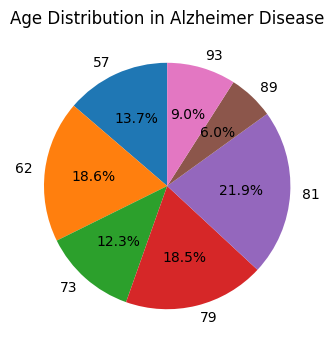

In [18]:
# prompt: plot a pie chart for the 'Alzheimer disease' category representing the 'Age' groups

import matplotlib.pyplot as plt

# Filter for 'Alzheimer disease'
alzheimer_obs = adata_filtered[adata_filtered.obs['disease'] == 'Alzheimer disease'].obs

# Count the number of samples for each age group within 'Alzheimer disease'
age_counts = alzheimer_obs.groupby('Age')['Age'].count()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution in Alzheimer Disease')
plt.show()

<ipython-input-29-b4246f51e025>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = adata_filtered.obs.groupby('Age')['nCount_RNA'].agg(['count', 'mean', 'std', 'min', 'max'])


     count         mean          std    min      max
Age                                                 
57    1608  1929.093284  1037.419191  603.0   6980.0
61    2429  3470.016056  1836.735404  601.0  12374.0
62    2183  2391.503894  1341.947003  602.0  10180.0
66    1899  7676.269616  3129.098580  687.0  22187.0
67    1769  3800.477671  2162.148423  629.0  17797.0
68     960  7000.101042  3006.286735  628.0  22291.0
71    1254  6490.204147  3894.902400  660.0  25162.0
72    2097  7453.404864  4365.335964  702.0  29487.0
73    1440  2310.877778  1389.959409  605.0   9830.0
79    2172  4202.683702  2334.453462  623.0  13947.0
81    2564  3476.212559  2012.920300  604.0  12297.0
87    1056  3117.439394  1591.780122  610.0  11518.0
89     705  5210.082270  2311.171385  625.0  20080.0
93    1061  3429.795476  1696.897287  617.0  11966.0


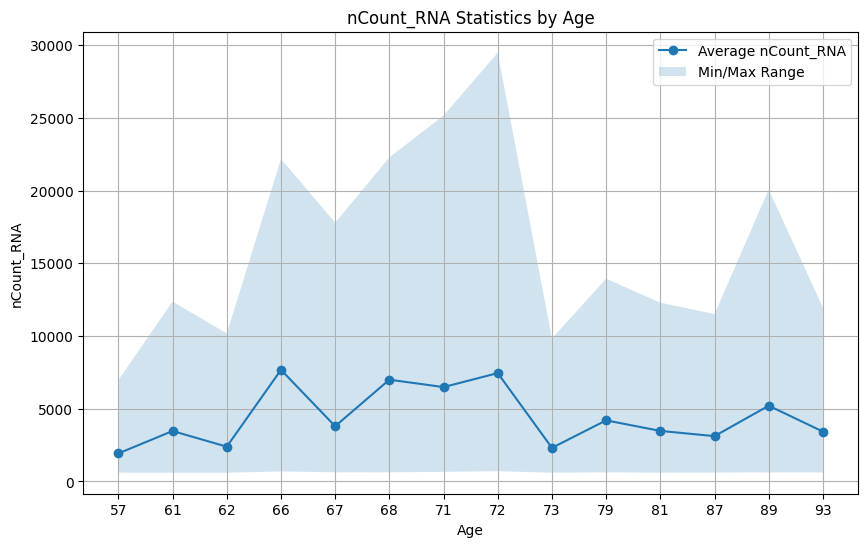

In [29]:
# prompt: for each 'Age' in ascending order, find the count of items, average, standard deviation, minimum and maximum of 'nCount_RNA', print the values and plot a line graph for it

# Group data by 'Age' and calculate the statistics for 'nCount_RNA'
age_stats = adata_filtered.obs.groupby('Age')['nCount_RNA'].agg(['count', 'mean', 'std', 'min', 'max'])

# Sort the results by 'Age' in ascending order
age_stats = age_stats.sort_index()

# Print the statistics
print(age_stats)

# Extract values for plotting
ages = age_stats.index.tolist()
counts = age_stats['count'].tolist()
means = age_stats['mean'].tolist()
stds = age_stats['std'].tolist()
mins = age_stats['min'].tolist()
maxs = age_stats['max'].tolist()


# Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(age_stats.index, age_stats['mean'], marker='o', label='Average nCount_RNA')
plt.fill_between(age_stats.index, age_stats['min'], age_stats['max'], alpha=0.2, label='Min/Max Range')
plt.xlabel('Age')
plt.ylabel('nCount_RNA')
plt.title('nCount_RNA Statistics by Age')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-30-df1bae5ceae7>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = adata_filtered.obs.groupby('Age')['nFeature_RNA'].agg(['count', 'mean', 'std', 'min', 'max'])


     count         mean          std  min   max
Age                                            
57    1608  1163.404229   473.558389  453  3290
61    2429  2043.364347   792.347951  470  4957
62    2183  1346.047641   555.225968  448  4199
66    1899  3289.081622   837.205062  526  5892
67    1769  1991.370831   772.869275  480  5623
68     960  3005.076042   809.164762  489  6021
71    1254  2566.021531   964.822833  528  5873
72    2097  2870.209824  1079.539655  480  6109
73    1440  1358.825000   619.027639  453  3921
79    2172  2217.551565   888.502328  433  5143
81    2564  1899.523401   836.387857  419  4866
87    1056  1729.673295   642.672697  465  4385
89     705  2455.392908   755.975969  486  6139
93    1061  1832.922714   689.202425  401  4497


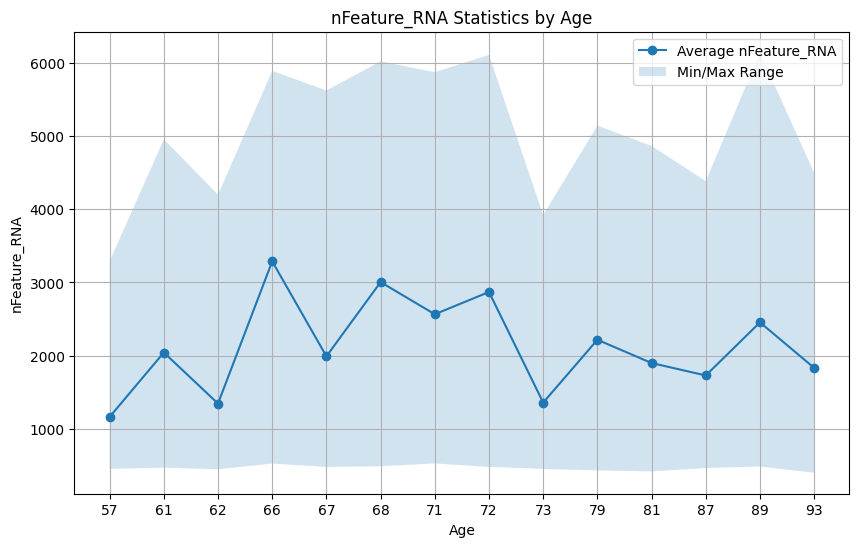

In [30]:
# prompt: for each 'Age' in ascending order, find the count of items, average, standard deviation, minimum and maximum of 'nFeature_RNA', print the values and plot a line graph for it

# Group data by 'Age' and calculate the statistics for 'nFeature_RNA'
age_stats = adata_filtered.obs.groupby('Age')['nFeature_RNA'].agg(['count', 'mean', 'std', 'min', 'max'])

# Sort the results by 'Age' in ascending order
age_stats = age_stats.sort_index()

# Print the statistics
print(age_stats)

# Extract values for plotting
ages = age_stats.index.tolist()
counts = age_stats['count'].tolist()
means = age_stats['mean'].tolist()
stds = age_stats['std'].tolist()
mins = age_stats['min'].tolist()
maxs = age_stats['max'].tolist()

# Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(age_stats.index, age_stats['mean'], marker='o', label='Average nFeature_RNA')
plt.fill_between(age_stats.index, age_stats['min'], age_stats['max'], alpha=0.2, label='Min/Max Range')
plt.xlabel('Age')
plt.ylabel('nFeature_RNA')
plt.title('nFeature_RNA Statistics by Age')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-31-d7e64d39b8de>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = adata_filtered.obs.groupby('Age')['nCount_SCT'].agg(['count', 'mean', 'std', 'min', 'max'])


     count         mean         std     min     max
Age                                                
57    1608  2483.631841  385.839529  1809.0  3885.0
61    2429  3256.803211  647.104956  2019.0  4470.0
62    2183  2630.761796  463.901268  1822.0  3778.0
66    1899  7054.457609  749.414690  5380.0  8274.0
67    1769  3306.700961  569.265614  2135.0  4370.0
68     960  6908.904167  721.385578  5417.0  8170.0
71    1254  6745.000797  704.946498  5370.0  8029.0
72    2097  6934.176443  748.750069  5469.0  8044.0
73    1440  2588.928472  485.624646  1771.0  3818.0
79    2172  3093.796501  536.225999  1824.0  3900.0
81    2564  2930.498440  567.759414  1772.0  3876.0
87    1056  3152.967803  560.560578  2081.0  4429.0
89     705  3292.460993  404.371934  1838.0  3829.0
93    1061  2977.699340  532.997682  1813.0  3810.0


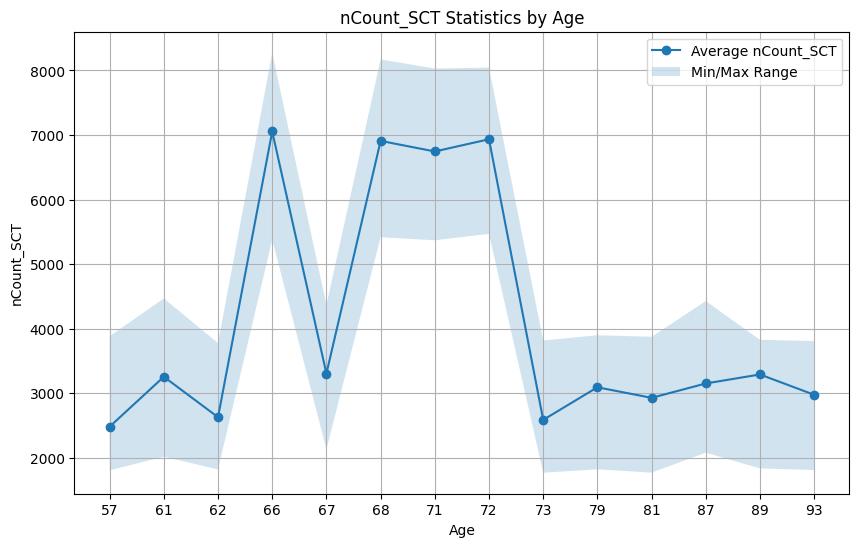

In [31]:
# prompt: for each 'Age' in ascending order, find the count of items, average, standard deviation, minimum and maximum of 'nCount_SCT', print the values and plot a line graph for it

# Group data by 'Age' and calculate the statistics for 'nCount_SCT'
age_stats = adata_filtered.obs.groupby('Age')['nCount_SCT'].agg(['count', 'mean', 'std', 'min', 'max'])

# Sort the results by 'Age' in ascending order
age_stats = age_stats.sort_index()

# Print the statistics
print(age_stats)

# Extract values for plotting
ages = age_stats.index.tolist()
counts = age_stats['count'].tolist()
means = age_stats['mean'].tolist()
stds = age_stats['std'].tolist()
mins = age_stats['min'].tolist()
maxs = age_stats['max'].tolist()


# Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(age_stats.index, age_stats['mean'], marker='o', label='Average nCount_SCT')
plt.fill_between(age_stats.index, age_stats['min'], age_stats['max'], alpha=0.2, label='Min/Max Range')
plt.xlabel('Age')
plt.ylabel('nCount_SCT')
plt.title('nCount_SCT Statistics by Age')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-33-7c6d3bc6d9c5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = adata_filtered.obs.groupby('Age')['nFeature_SCT'].agg(['count', 'mean', 'std', 'min', 'max'])


     count         mean         std   min   max
Age                                            
57    1608  1183.054104  427.591459   573  2861
61    2429  1987.507616  645.622731   779  3295
62    2183  1341.863491  476.759766   628  2752
66    1899  3248.397578  644.852602  1687  4683
67    1769  1885.296213  556.537540   747  3140
68     960  3003.593750  617.010016  1688  4353
71    1254  2581.463317  663.538652  1586  4164
72    2097  2814.050072  737.468796  1459  4300
73    1440  1349.900694  523.550115   595  2779
79    2172  1947.178177  546.083390   588  2994
81    2564  1757.333853  598.734513   628  2902
87    1056  1719.437500  546.687299   748  3098
89     705  2059.217021  417.459276   647  2728
93    1061  1753.101791  550.047949   610  2797


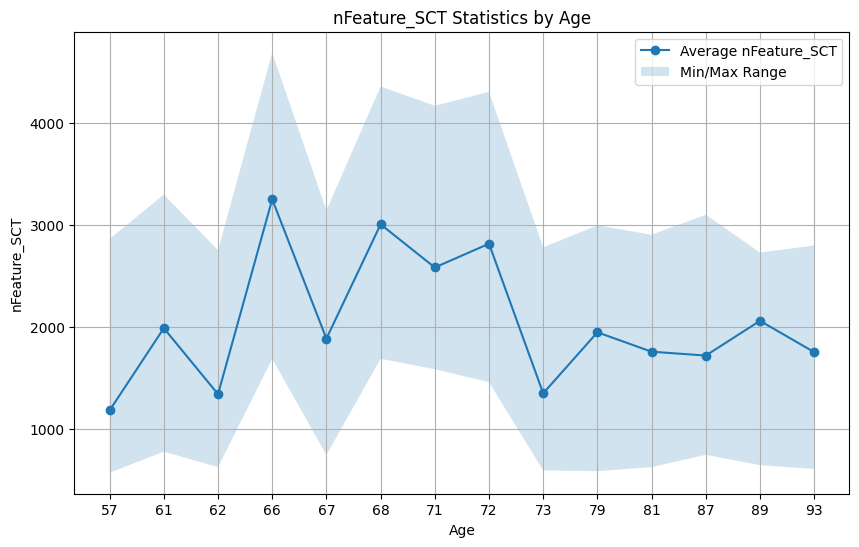

In [33]:
# prompt: for each 'Age' in ascending order, find the count of items, average, standard deviation, minimum and maximum of 'nFeature_SCT', print the values and plot a line graph for it

# Group data by 'Age' and calculate the statistics for 'nFeature_SCT'
age_stats = adata_filtered.obs.groupby('Age')['nFeature_SCT'].agg(['count', 'mean', 'std', 'min', 'max'])

# Sort the results by 'Age' in ascending order
age_stats = age_stats.sort_index()

# Print the statistics
print(age_stats)

# Extract values for plotting
ages = age_stats.index.tolist()
counts = age_stats['count'].tolist()
means = age_stats['mean'].tolist()
stds = age_stats['std'].tolist()
mins = age_stats['min'].tolist()
maxs = age_stats['max'].tolist()


# Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(age_stats.index, age_stats['mean'], marker='o', label='Average nFeature_SCT')
plt.fill_between(age_stats.index, age_stats['min'], age_stats['max'], alpha=0.2, label='Min/Max Range')
plt.xlabel('Age')
plt.ylabel('nFeature_SCT')
plt.title('nFeature_SCT Statistics by Age')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-36-29020b1af332>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = adata_filtered.obs.groupby('Age')['nCount_Exon'].agg(['count', 'mean', 'std', 'min', 'max'])


     count         mean          std    min      max
Age                                                 
57    1608   952.552861   563.816518  228.0   4776.0
61    2429  2345.149444  1360.958692  328.0   8743.0
62    2183  1039.644068   633.743351  201.0   7655.0
66    1899  2886.313323  1303.767132  203.0  10681.0
67    1769  1985.893725  1446.702745  254.0  12723.0
68     960  2144.388542   917.415934  247.0   8668.0
71    1254  1546.811005   861.607623  221.0   7316.0
72    2097  1931.899857  1129.734728  236.0   8565.0
73    1440  1085.290278   731.670145  203.0   5395.0
79    2172  2227.266114  1423.956667  322.0   9226.0
81    2564  1935.236349  1264.224442  277.0   9226.0
87    1056  1281.147727   663.735305  183.0   4508.0
89     705  2444.095035  1155.399010  290.0   8616.0
93    1061  1650.491046   874.670052  262.0   6499.0


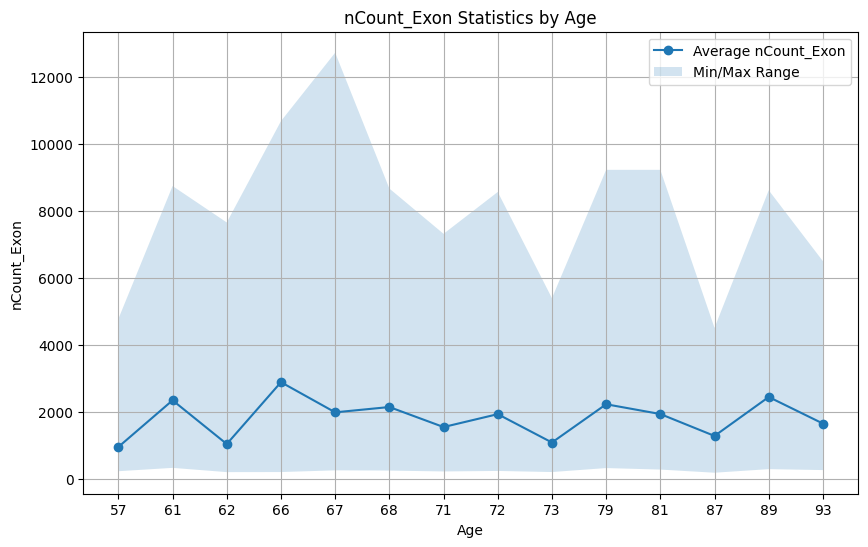

In [36]:
# prompt: for each 'Age' in ascending order, find the count of items, average, standard deviation, minimum and maximum of 'nCount_Exon', print the values and plot a line graph for it

# Group data by 'Age' and calculate the statistics for 'nCount_Exon'
age_stats = adata_filtered.obs.groupby('Age')['nCount_Exon'].agg(['count', 'mean', 'std', 'min', 'max'])

# Sort the results by 'Age' in ascending order
age_stats = age_stats.sort_index()

# Print the statistics
print(age_stats)

# Extract values for plotting
ages = age_stats.index.tolist()
counts = age_stats['count'].tolist()
means = age_stats['mean'].tolist()
stds = age_stats['std'].tolist()
mins = age_stats['min'].tolist()
maxs = age_stats['max'].tolist()


# Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(age_stats.index, age_stats['mean'], marker='o', label='Average nCount_Exon')
plt.fill_between(age_stats.index, age_stats['min'], age_stats['max'], alpha=0.2, label='Min/Max Range')
plt.xlabel('Age')
plt.ylabel('nCount_Exon')
plt.title('nCount_Exon Statistics by Age')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-37-7128efd438e9>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = adata_filtered.obs.groupby('Age')['nFeature_Exon'].agg(['count', 'mean', 'std', 'min', 'max'])


     count         mean         std  min   max
Age                                           
57    1608   617.753109  300.802562  192  2338
61    2429  1502.615480  662.408484  286  3956
62    2183   654.641777  322.532177  158  3258
66    1899  1779.937862  595.329686  157  4210
67    1769  1168.103448  605.083841  195  4280
68     960  1404.391667  479.745423  209  3583
71    1254   998.861244  485.848910  187  3567
72    2097  1188.342871  582.157422  177  3598
73    1440   734.308333  412.442174  177  2729
79    2172  1328.569982  650.556295  223  3909
81    2564  1173.652106  620.920046  228  3836
87    1056   822.397727  350.998831  144  2388
89     705  1334.939007  505.535318  229  3698
93    1061  1001.118756  445.981226  209  2996


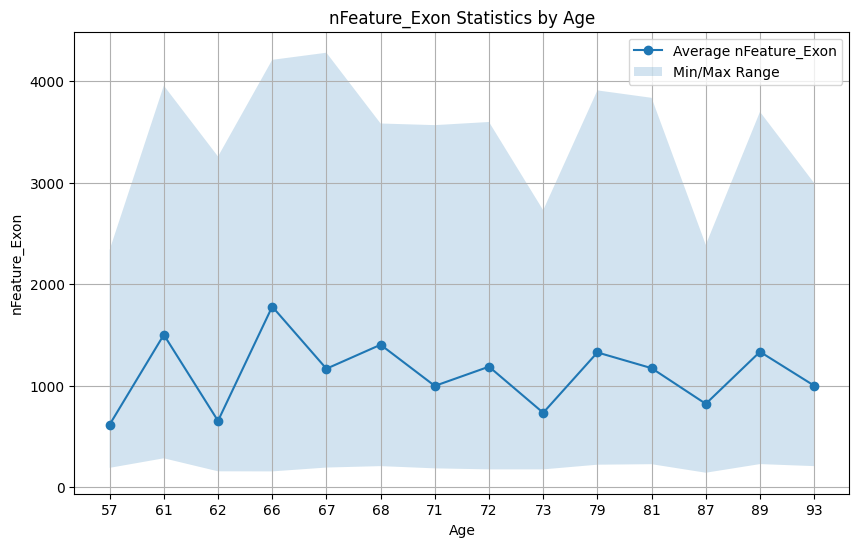

In [37]:
# prompt: for each 'Age' in ascending order, find the count of items, average, standard deviation, minimum and maximum of 'nFeature_Exon', print the values and plot a line graph for it

# Group data by 'Age' and calculate the statistics for 'nFeature_Exon'
age_stats = adata_filtered.obs.groupby('Age')['nFeature_Exon'].agg(['count', 'mean', 'std', 'min', 'max'])

# Sort the results by 'Age' in ascending order
age_stats = age_stats.sort_index()

# Print the statistics
print(age_stats)

# Extract values for plotting
ages = age_stats.index.tolist()
counts = age_stats['count'].tolist()
means = age_stats['mean'].tolist()
stds = age_stats['std'].tolist()
mins = age_stats['min'].tolist()
maxs = age_stats['max'].tolist()


# Plot a line graph
plt.figure(figsize=(10, 6))
plt.plot(age_stats.index, age_stats['mean'], marker='o', label='Average nFeature_Exon')
plt.fill_between(age_stats.index, age_stats['min'], age_stats['max'], alpha=0.2, label='Min/Max Range')
plt.xlabel('Age')
plt.ylabel('nFeature_Exon')
plt.title('nFeature_Exon Statistics by Age')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-42-e4f1bb35e316>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cell_type_counts = adata_filtered.obs.groupby(['Age', 'Cell.Types'])['Cell.Types'].count().unstack()


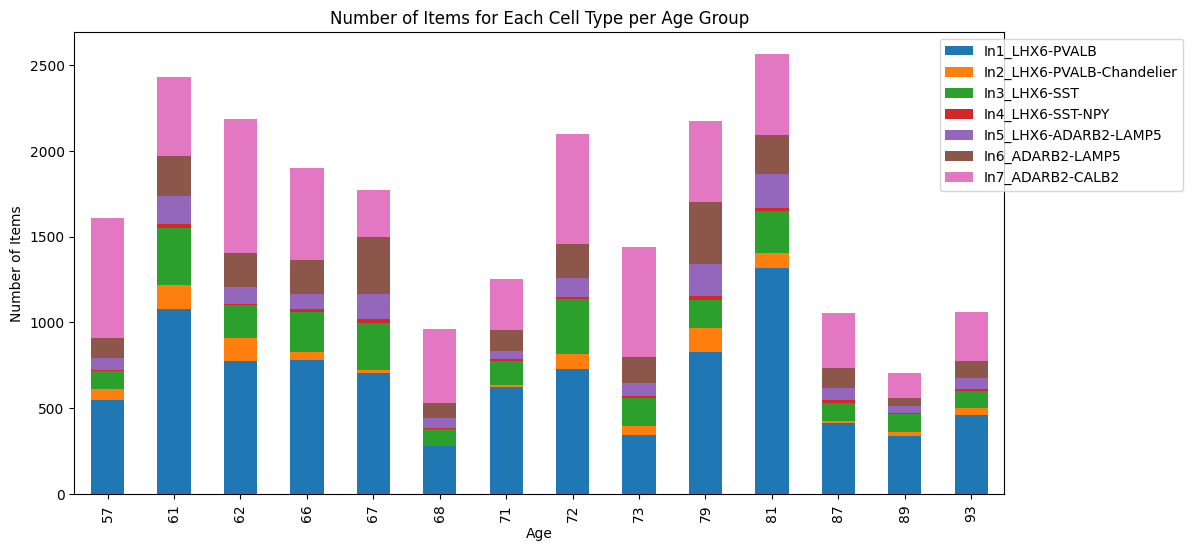

In [42]:
# prompt: for each 'Age' in ascending order, print the number of items for each 'Cell.Types' and make a stacked bar graph (shift legend to right upper corner)

import matplotlib.pyplot as plt

# Group data by 'Age' and 'Cell.Types' to count the number of items in each group
age_cell_type_counts = adata_filtered.obs.groupby(['Age', 'Cell.Types'])['Cell.Types'].count().unstack()

# Sort by 'Age' in ascending order
age_cell_type_counts = age_cell_type_counts.sort_index()

# Plot the stacked bar graph
ax = age_cell_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Age')
plt.ylabel('Number of Items')
plt.title('Number of Items for Each Cell Type per Age Group')

# Shift the legend to the right upper corner
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()
